# Programming Quantum Computers with Qiskit

## Introduction and Prerequisites

`Qiskit` is an open-source quantum computing software development framework created by IBM. It provides tools for designing, simulating, and running quantum algorithms on local simulators and real quantum hardware. Today, we'll use `Qiskit` to program and visualize quantum circuits and simulate their output on an ideal noiseless quantum computer.

**Note:** There are code-breaking changes to the Qiskit API between minor versions. This notebook assumes version `2.0.x`, which should be satisfied if you set up a Python virtual environment as outlined in the the repository `README.md`.

[**Documentation for Qiskit version 2.0.0**](https://docs.quantum.ibm.com/api/qiskit/2.0)




## Quantum circuits

The Qiskit programming model is based on **quantum circuits**. A **quantum circuit** is the quantum-computing analogue of a classical logic circuit. 

A quantum circuit starts with a **register** of $n$ **qubits** which, by convension, are in the $\ket{0}^{\otimes n}$ state (i.e. $\ket{0\dots0}$). The program is then defined by specifying the application of unitary quantum logic **gates** that act on one more qubits. To obtain classical information from the state prepared by the quantum circuit, the qubits are measured in the computational basis ($\{\ket{0}, \ket{1}\}$), with the results stored in a classical register of $n$ **bits**.

Because every gate is unitary, the overall evolution preserves the norm of the state vector, ensuring that probabilities sum to one.  Designing an algorithm amounts to choosing a gate sequence that steers the initial state toward one that, when measured, solves the task at hand with high probability.

To create a quantum circuit in Qiskit with $n=2$ qubits:

```python
from qiskit import QuantumCircuit

qc = QuantumCircuit(2) 
```
### Single-Qubit Gates

Below is a non-exhaustive list of single-qubit gates. The Qiskit call for each of the gates is given where `qc` is a `QuantumCircuit` instance and `q` is an integer that indexes the target qubit.


To see how these gates act, we use the **Bloch sphere**: a unit sphere where any pure qubit state corresponds to a point on its surface.  The north and south poles represent $\ket0$ and $\ket1$, while points on the equator encode equal superpositions with varying phases. 

| Name     | Description           | Gate      | Qiskit call       | Action (bra–ket)                                                                                                                                                           | Action (Bloch Sphere)              |
| -------- | --------------------- | --------- | ----------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------ |
| Pauli-X or NOT  | Bit-flip              | **X**     | `qc.x(q)`         | $X\ket{0} = \ket{1},\quad X\ket{1} = \ket{0}$                                                                                                                              | ![](images/bloch_X.gif)  |
| Pauli-Z or Phase | Phase-flip            | **Z**     | `qc.z(q)`         | $Z\ket{0} = \ket{0},\quad Z\ket{1} = -\ket{1}$                                                                                                                             | ![](images/bloch_Z.gif)  |
| Hadamard | Creates superposition | **H**     | `qc.h(q)`         | $H\ket{0} = \tfrac{\ket{0}+\ket{1}}{\sqrt{2}},\quad H\ket{1} = \tfrac{\ket{0}-\ket{1}}{\sqrt{2}}$                                                                          | ![](images/bloch_H.gif)  |
| RX       | Parameterised rotation about X-axis | **RX(θ)** | `qc.rx(theta, q)` | $R_X(\theta)\ket{0} = \cos\tfrac{\theta}{2}\ket{0} - i\sin\tfrac{\theta}{2}\ket{1},\;\;R_X(\theta)\ket{1} = -i\sin\tfrac{\theta}{2}\ket{0} + \cos\tfrac{\theta}{2}\ket{1}$ | ![](images/bloch_RX.gif) |
| RZ       | Parameterised rotation about Z-axis | **RZ(θ)** | `qc.rz(theta, q)` | $R_Z(\theta)\ket{0} = e^{-i\theta/2}\ket{0},\quad R_Z(\theta)\ket{1} = e^{+i\theta/2}\ket{1}$                                                                              | ![](images/bloch_RZ.gif) |

### Two-Qubit Gates

**Two-qubit gates** are essential for the  creation of entaglement between qubits. The allows the implementation of "conditional" logic where the transformation of one qubit is contingent on the state of another. 

The canonical example is the Controlled-NOT (CNOT) gate, which flips one qubit (the *target*) only if a second qubit (the *control*) is in $\ket1$: 

$$
\text{CNOT} \ket{00} = \ket{00}
$$

$$
\text{CNOT} \ket{01} = \ket{01}
$$

$$
\text{CNOT} \ket{10} = \ket{11}
$$

$$
\text{CNOT} \ket{11} = \ket{10}
$$

A CNOT gate is called in Qiskit as `qc.cx(ctrl, targ)`, where `ctrl` is the index of the **control** qubit and `targ` is the index of the **target** qubit.

### Quantum-circuit diagrams

**Quantum circuit diagrams** are a diagrammatic language for visualising the logic of a quantum program. 

The circuit represents the trajectory of each qubit from left-to-right with horizontal **wires**. The application of a single qubit gate to a particular  qubit is shown by placing a labeled box on its wire. Vertical links between wires indicate multi-qubit gates and a meter symbol indicates measurement.

The diagram below shows a circuit for the preparation of a Bell state $\ket{\psi} = \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$:


![](images_/bell_circuit.png)

First the Hadamard creates a superposition on $q_0$. Next, the CNOT entangles $q_0$ with $q_1$, with $q_0$ as the control gate and $q_1$ as the target. Finally, both qubits are then measured. 


In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2) #  create a quantum circuit with a quantum register of two qubits and a classical register of two bits

# Note: Each qubit starts in |0> state, notated as |00> (or just |0> for short)

qc.h(0) # apply a Hadamard  gate to  qubit  zero, putting it  into a superposition of |0> and |1>
qc.cx(0, 1) #  apply a CNOT  gate with qubit zero as the control and qubit  one as the target
qc.measure_all() # measure qubit zero and one, storing  the result in classical registers zero and one

qc.draw() # visualise the ciruit

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

# Simulating Quantum Circuits

To simulate the circuit we'll `AerSimulator` from the `qiskit_aer` package. Qiskit Aer is Qiskit's high-performance simulation backend, it supports a wide variety of simulation methods, and can be configured to use OpenMP (enabled by default), GPU-acceleration and MPI. 

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator # import the Qiskit Aer simulation backend

shots  = 50 # number of shots (repeated runs of  the quantum circuit)

backend = AerSimulator() # create the backend instance, CPU-based with OpenMP by default 
tqc = transpile(qc, backend) # transpile the circuit for the AerSimulator backend
result  = backend.run(tqc, shots=shots).result() # run the circuit and get the result
counts = result.get_counts() # get the count of each measured state
print(counts)

{'11': 28, '00': 22}


Below we see the results of the simulation compared the expectation values of $\ket{00}$ and $\ket{11}$ in a Bell-state. With a small number of shots the discrepancy between the analytical expectation value and the empherical results can be quite large. 

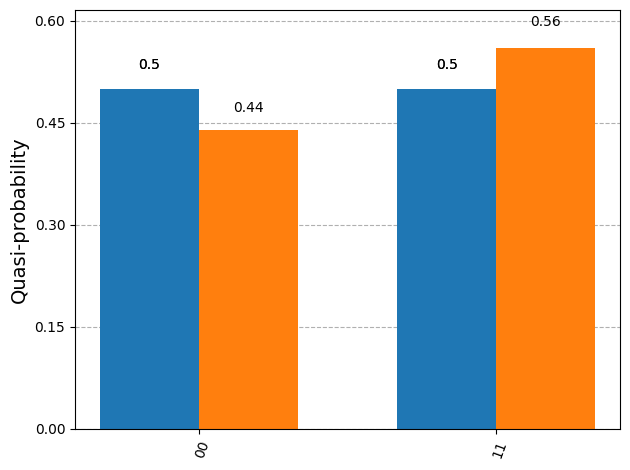

In [4]:
from qiskit.visualization import plot_histogram

expected_counts = {'00': 0.5 * shots, '11': 0.5 * shots}

plot_histogram([expected_counts, counts])

## Initialising a Uniform Superposition

A common "algorithmic primitive" is the preparation of the uniform superposition state:

$$
\ket{\psi} = \frac{1}{\sqrt{2^n}} \sum_{k  = 0}^{2^n} \ket{k}
$$

where $\ket{k}$ is the base-10 representation of an $n$-qubit basis state. For example, if $n$=2 we have:

$$
\ket{0} =  \ket{00}
$$
$$
\ket{1} =  \ket{01}
$$
$$
\ket{2} =  \ket{10}
$$
$$
\ket{3} =  \ket{11}
$$

Recall that a H (Hadmard) gate transforms a single qubit in the $\ket{0}$ state to a uniform superposition of $\ket{0}$ and $\ket{1}$. So, to prepare a uniform superposition, we apply an H gate to each qubit.

You have observed that a uniform superposition maps one-to-one with the full space of Max-Cut solutions for a graph of $n$ nodes. We'll take advantage of this relationship in the next section.

In [ ]:
nqubits = 3
shots = 30

qc = QuantumCircuit(nqubits, nqubits)

for q in range(nqubits):
    qc.h(q)
    qc.measure(q, q)

qc.draw()

┌───┐┌─┐      
q_0: ┤ H ├┤M├──────
     ├───┤└╥┘┌─┐   
q_1: ┤ H ├─╫─┤M├───
     ├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├─╫──╫─┤M├
     └───┘ ║  ║ └╥┘
c: 3/══════╩══╩══╩═
           0  1  2

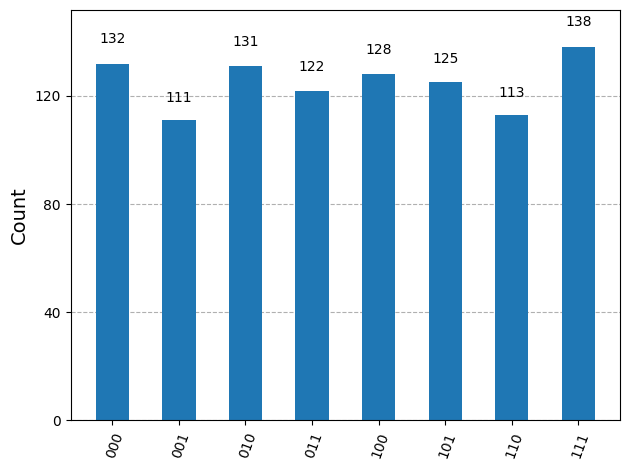

In [6]:
backend = AerSimulator()
tqc     = transpile(qc, backend)
result  = backend.run(tqc, shots=shots).result()
counts = result.get_counts()
plot_histogram(counts)

## Summary

The basic workflow is:

1. Create a quantum `QuantumCircuit` object with a register of `n` qubits and a classical register of (typically) `n` bits, where the classical registers store the read-out state of each qubit.

2. Construct the quantum circuit, specifying the application of quantum gates and measurement operations on particular qubits.

3. Transpile the circuit to run on a target backend—either a simulator or real hardware. Transpilation optimizes the circuit and expresses it in the "native-gate" set of the target. Transpilers for real (noisy) hardware will also work to minimize circuit depth and error rates by accounting for the relative fidelity and physical layout of the qubits on the QPU.

4. Submit the circuit to the device, which is executed repeatedly to collect results for a specified number of shots, sampling the quantum distribution.

5. Retrieve the results, which are formatted as a dictionary of bitstrings and counts.

6. Post-process the results for the next stage of computation or human interpretability.